<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/CNNipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
classes = ['aviao', 'carro', 'passaro', 'gato', 'cervo', 'cachorro', 'sapo', 'navio', 'caminhao']

modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'
    ])

In [ ]:
hist =  modelo.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3647 - loss: 1.7322 - val_accuracy: 0.5641 - val_loss: 1.2207
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5890 - loss: 1.1581 - val_accuracy: 0.6425 - val_loss: 1.0323
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6473 - loss: 0.9957 - val_accuracy: 0.6681 - val_loss: 0.9653
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6793 - loss: 0.9028 - val_accuracy: 0.6572 - val_loss: 0.9723
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7089 - loss: 0.8255 - val_accuracy: 0.6850 - val_loss: 0.9137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7339 - loss: 0.7484 - val_accuracy: 0.6861 - val_loss: 0.9325
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7524 - loss: 0.7026 - val_accuracy: 0.6907 - val_loss: 0.9101
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7719 - loss: 0.647

313/313 - 1s - 2ms/step - accuracy: 0.7043 - loss: 0.9189


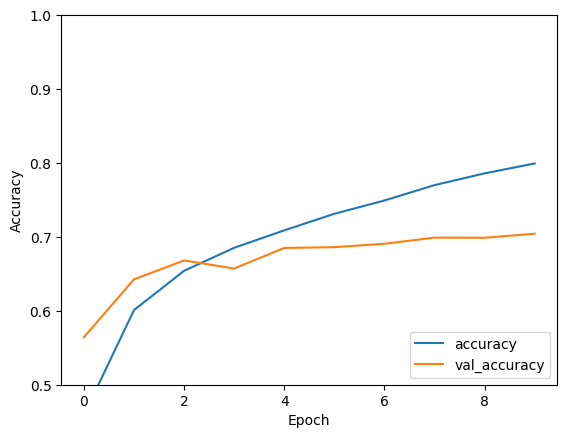

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=2)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sapo.jpg to sapo.jpg


In [ ]:
img = image.load_img('sapo.jpg', target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0)

prev = modelo.predict(img_array)

prev_index = np.argmax(prev, axis=1)[0]
prev_classe = classes[prev_index]

print(f'Classe prevista: {prev_classe}')
print(f'Confiança {prev[0][prev_index]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Classe prevista: sapo
Confiança 0.99
